# 纽约市出租车GPS数据分析

Author: Li Zhen

## 导入与预处理Import and preprocess

In [2]:
# 导入需要用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas.tseries.holiday import USFederalHolidayCalendar as calander

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
# 导入数据
warnings.filterwarnings("ignore")
data = pd.read_csv('./green_tripdata_2019-09.csv')
data

VendorID lpep_pickup_datetime lpep_dropoff_datetime  \
0            2.0  2019-09-01 00:10:53   2019-09-01 00:23:46   
1            2.0  2019-09-01 00:31:22   2019-09-01 00:44:37   
2            2.0  2019-09-01 00:50:24   2019-09-01 01:03:20   
3            2.0  2019-09-01 00:27:06   2019-09-01 00:33:22   
4            2.0  2019-09-01 00:43:23   2019-09-01 00:59:54   
...          ...                  ...                   ...   
449058       NaN  2019-09-30 23:13:00   2019-09-30 23:41:00   
449059       NaN  2019-09-30 23:26:00   2019-09-30 23:46:00   
449060       NaN  2019-09-30 23:15:00   2019-09-30 23:43:00   
449061       NaN  2019-09-30 23:19:00   2019-10-01 00:06:00   
449062       NaN  2019-09-30 23:35:00   2019-09-30 23:58:00   

       store_and_fwd_flag  RatecodeID  PULocationID  DOLocationID  \
0                       N         1.0            65           189   
1                       N         1.0            97           225   
2                       N         1.0            37            61   
3                       N         1.0           145           112   
4                       N         1.0           112           198   
...                   ...         ...           ...           ...   
449058                NaN         NaN            66            71   
449059                NaN         NaN            55            26   
449060                NaN         NaN           139            78   
449061                NaN         NaN           242           188   
449062                NaN         NaN           155           189   

        passenger_count  trip_distance  fare_amount  extra  mta_tax  \
0                   5.0           2.00        10.50   0.50      0.5   
1                   5.0           3.20        12.00   0.50      0.5   
2                   5.0           2.99        12.00   0.50      0.5   
3                   1.0           1.73         7.50   0.50      0.5   
4                   1.0           3.42        14.00   0.50      0.5   
...                 ...            ...          ...    ...      ...   
449058              NaN           7.84        43.25   2.75      0.5   
449059              NaN           3.56        25.75   2.75      0.5   
449060              NaN          18.47        50.47   2.75      0.5   
449061              NaN          20.10        58.22   2.75      0.5   
449062              NaN           5.87        26.07   2.75      0.5   

        tip_amount  tolls_amount  ehail_fee  improvement_surcharge  \
0             2.36          0.00        NaN                    0.3   
1             0.00          0.00        NaN                    0.3   
2             0.00          0.00        NaN                    0.3   
3             1.50          0.00        NaN                    0.3   
4             3.06          0.00        NaN                    0.3   
...            ...           ...        ...                    ...   
449058        0.00          0.00        NaN                    0.0   
449059        0.00          0.00        NaN                    0.0   
449060        0.00          6.12        NaN                    0.0   
449061        0.00          6.12        NaN                    0.0   
449062        0.00          0.00        NaN                    0.0   

        total_amount  payment_type  trip_type  congestion_surcharge  
0              14.16           1.0        1.0                   0.0  
1              13.30           2.0        1.0                   0.0  
2              13.30           2.0        1.0                   0.0  
3              10.30           1.0        1.0                   0.0  
4              18.36           1.0        1.0                   0.0  
...              ...           ...        ...                   ...  
449058         46.50           NaN        NaN                   NaN  
449059         29.00           NaN        NaN                   NaN  
449060         59.84           NaN        NaN                   NaN  
449061         67.59        

In [12]:
# 查看数据描述
data.describe()

VendorID     RatecodeID   PULocationID   DOLocationID  \
count  389920.000000  389920.000000  449063.000000  449063.000000   
mean        1.837777       1.106971     108.139203     130.154678   
std         0.368656       0.723302      71.025032      76.577260   
min         1.000000       1.000000       1.000000       1.000000   
25%         2.000000       1.000000      56.000000      65.000000   
50%         2.000000       1.000000      82.000000     129.000000   
75%         2.000000       1.000000     166.000000     195.000000   
max         2.000000      99.000000     265.000000     265.000000   

       passenger_count  trip_distance    fare_amount          extra  \
count    389920.000000  449063.000000  449063.000000  449063.000000   
mean          1.311900       3.519991      15.491455       0.697539   
std           0.969761       4.083097      13.561680       1.022319   
min           0.000000       0.000000    -200.000000      -4.500000   
25%           1.000000       1.100000       7.000000       0.000000   
50%           1.000000       2.090000      11.000000       0.500000   
75%           1.000000       4.220000      20.000000       1.000000   
max           9.000000     341.640000    1761.000000       8.250000   

             mta_tax     tip_amount   tolls_amount  ehail_fee  \
count  449063.000000  449063.000000  449063.000000        0.0   
mean        0.484626       1.037571       0.312411        NaN   
std         0.097407       2.261574       1.416886        NaN   
min        -0.500000      -3.890000     -15.400000        NaN   
25%         0.500000       0.000000       0.000000        NaN   
50%         0.500000       0.000000       0.000000        NaN   
75%         0.500000       1.660000       0.000000        NaN   
max        17.330000     400.000000      33.240000        NaN   

       improvement_surcharge   total_amount   payment_type      trip_type  \
count          449063.000000  449063.000000  389920.000000  389920.000000   
mean                0.253791      18.624612       1.456383       1.024685   
std                 0.110241      15.243472       0.522117       0.155162   
min                -0.300000    -200.000000       1.000000       1.000000   
25%                 0.300000       8.800000       1.000000       1.000000   
50%                 0.300000      13.550000       1.000000       1.000000   
75%                 0.300000      24.050000       2.000000       1.000000   
max                 0.300000    1762.800000       5.000000       2.000000   

       congestion_surcharge  
count         389920.000000  
mean               0.439440  
std                1.007679  
min               -2.750000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                2.750000

In [13]:
# 预处理：时间类特征
data['lpep_pickup_datetime'] = pd.to_datetime(data['lpep_pickup_datetime'])
data['lpep_dropoff_datetime'] = pd.to_datetime(data['lpep_dropoff_datetime'])
data['date'] = data['lpep_pickup_datetime'].dt.normalize()
data['time'] = data['lpep_pickup_datetime'].dt.hour
data['weekday'] = data['lpep_pickup_datetime'].dt.day_name()
data['duration'] = data['lpep_dropoff_datetime'] - data['lpep_pickup_datetime']
data['duration'] = data['duration'] / np.timedelta64(1, 'm')

In [14]:
# 预处理：判断是否为假期
cal = calander()
holidays = cal.holidays(start='2019-09-01', end='2019-09-30')
data['holiday'] = data['date'].isin(holidays)
data['week'] = data['date'].dt.dayofweek
data.loc[data['week'] >= 5, 'day_type'] = "weekend"
data.loc[data['week'] < 5, 'day_type'] = "workday"
data.loc[data['holiday'] == True, 'day_type'] = "holiday"
data = data.drop(['holiday', 'week'], axis=1)

In [15]:
# 预处理：划分时间段
def time_slots(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,17):
        return 'Afternoon'
    elif x in range(17,22):
        return 'Evening'
    else:
        return 'Late Night'

data['time_desc'] = data['time'].apply(time_slots)

In [16]:
# 预处理：按起始时间对订单排序
data.sort_values(by=['lpep_pickup_datetime'], inplace=True)    

In [17]:
# 预处理：除去不需要的列，除去空值
data = data.drop(['VendorID','lpep_pickup_datetime', 'lpep_dropoff_datetime', 'store_and_fwd_flag', 'RatecodeID','extra', 'mta_tax', 'tolls_amount', 'ehail_fee',
               'improvement_surcharge', 'congestion_surcharge', 'fare_amount', 'trip_type', ], axis=1)
data.dropna(inplace=True)
data.shape

(389920, 13)

In [18]:
data.describe()

PULocationID   DOLocationID  passenger_count  trip_distance  \
count  389920.000000  389920.000000    389920.000000  389920.000000   
mean      106.042234     130.661956         1.311900       2.793666   
std        70.155387      76.764905         0.969761       3.264772   
min         1.000000       1.000000         0.000000       0.000000   
25%        55.000000      66.000000         1.000000       1.010000   
50%        82.000000     129.000000         1.000000       1.790000   
75%       153.000000     195.000000         1.000000       3.270000   
max       265.000000     265.000000         9.000000     341.640000   

          tip_amount   total_amount   payment_type           time  \
count  389920.000000  389920.000000  389920.000000  389920.000000   
mean        1.193537      15.906426       1.456383      13.939480   
std         2.386559      13.467623       0.522117       5.904058   
min        -3.890000    -200.000000       1.000000       0.000000   
25%         0.000000       8.300000       1.000000      10.000000   
50%         0.000000      12.050000       1.000000      15.000000   
75%         1.960000      18.800000       2.000000      19.000000   
max       400.000000    1762.800000       5.000000      23.000000   

            duration  
count  389920.000000  
mean       20.634229  
std        93.685971  
min         0.000000  
25%         6.733333  
50%        11.183333  
75%        18.083333  
max      6045.033333

In [19]:
# 预处理：清洗异常数据
data = data[(data['passenger_count'] > 0) & (data['passenger_count'] < 7)]    # 乘客数为0
data = data[(data['trip_distance'] > 0.5) & (data['trip_distance'] <= 100)]    # 行驶距离为0.5~100
data = data[(data['duration'] > 1) & (data['duration'] <= 40)]    # 乘车时间1~40
data = data[(data['payment_type'] != 3) & (data['payment_type'] != 4) \
            & (data['payment_type'] != 5) & (data['payment_type'] != 6)]    # 支付方式
data = data[(data['PULocationID'] >= 1) & (data['PULocationID'] <= 263) &\
            (data['DOLocationID'] >= 1) & (data['DOLocationID'] <= 263)]    # loc不在纽约
data = data[(pd.to_datetime(data['date']).dt.year == 2019) & (pd.to_datetime(data['date']).dt.month == 9)]

In [22]:
data.T
data.describe()

PULocationID   DOLocationID  passenger_count  trip_distance  \
count  340380.000000  340380.000000    340380.000000  340380.000000   
mean      105.119986     130.763414         1.321544       2.664473   
std        69.513610      76.150367         0.980553       2.402935   
min         3.000000       1.000000         1.000000       0.510000   
25%        56.000000      67.000000         1.000000       1.160000   
50%        82.000000     129.000000         1.000000       1.880000   
75%       152.000000     195.000000         1.000000       3.210000   
max       263.000000     263.000000         6.000000      35.700000   

          tip_amount   total_amount   payment_type           time  \
count  340380.000000  340380.000000  340380.000000  340380.000000   
mean        1.191566      14.744016       1.441927      13.991662   
std         2.069227       9.118085       0.496617       5.941710   
min         0.000000      -5.800000       1.000000       0.000000   
25%         0.000000       8.800000       1.000000      10.000000   
50%         0.000000      12.050000       1.000000      15.000000   
75%         2.000000      17.800000       2.000000      19.000000   
max       400.000000     412.300000       2.000000      23.000000   

            duration  
count  340380.000000  
mean       13.203311  
std         7.831954  
min         1.016667  
25%         7.283333  
50%        11.283333  
75%        17.200000  
max        40.000000

In [4]:
# data.to_csv('./2019-09.csv', index=False)    # 保存文件
data = pd.read_csv('./2019-09.csv')
data.T

0           1           2           3           4       \
PULocationID             71          65          65          37         129   
DOLocationID             91         112         195          89         223   
passenger_count           2           1           2           1           1   
trip_distance          2.68           5        4.07         5.2         2.3   
tip_amount                0           0           0           0           0   
total_amount           13.3        16.8        15.3        21.3         9.8   
payment_type              1           1           2           1           1   
date             2019-09-01  2019-09-01  2019-09-01  2019-09-01  2019-09-01   
time                      0           0           0           0           0   
weekday              Sunday      Sunday      Sunday      Sunday      Sunday   
duration            14.2333     11.3667     14.1333     25.2333     6.53333   
day_type            weekend     weekend     weekend     weekend     weekend   
time_desc        Late Night  Late Night  Late Night  Late Night  Late Night   

                     5           6           7           8           9       \
PULocationID            226          66         145          93         181   
DOLocationID            129          54          49         198          62   
passenger_count           1           1           1           1           1   
trip_distance          1.63         1.6        4.94         5.4        1.74   
tip_amount                0        1.75           0           0        2.45   
total_amount           10.3       10.55        19.8        18.8       12.25   
payment_type              2           1           2           2           1   
date             2019-09-01  2019-09-01  2019-09-01  2019-09-01  2019-09-01   
time                      0           0           0           0           0   
weekday              Sunday      Sunday      Sunday      Sunday      Sunday   
duration            10.9833     7.28333     21.5333        13.5         8.7   
day_type            weekend     weekend     weekend     weekend     weekend   
time_desc        Late Night  Late Night  Late Night  Late Night  Late Night   

                 ...      340370      340371      340372      340373  \
PULocationID     ...          42         129          80          74   
DOLocationID     ...          41         129          36          74   
passenger_count  ...           1           1           1           1   
trip_distance    ...        0.71        1.16        3.73         0.8   
tip_amount       ...           0           0        3.36           0   
total_amount     ...         6.3         8.3       20.16         5.8   
payment_type     ...           2           2           1           2   
date             ...  2019-09-30  2019-09-30  2019-09-30  2019-09-30   
time             ...          23          23          23          23   
weekday          ...      Monday      Monday      Monday      Monday   
duration         ...     4.71667     6.61667     18.5333     3.88333   
day_type         ...     workday     workday     workday     workday   
time_desc        ...  Late Night  Late Night  Late Night  Late Night   

                     340374      340375      340376      340377      340378  \
PULocationID             82          80         223          82          42   
DOLocationID            260         255         223          82         238   
passenger_count           5           2           1           1           1   
trip_distance          1.44         1.4        1.21        0.55        2.54   
tip_amount                0           1           0           0        3.51   
total_amount            8.3         9.8         7.8         5.3       17.56   
payment_type              2           1           2           2           1   
date             2019-09-30  2019-09-30  2019-09-30  2019-09-30  2019-09-30   
time                     23          23          23          23          23   
weekday 

## 分析和可视化Analyzing and visualisation

### 1天内出行情况的变化（以2019.09.01、2019.09.10、2019.09.26为例）

In [25]:
for i in range(data.shape[0]):
    if pd.to_datetime(data['date'][i]).day != 1:
        # print(i)
        break
data01 = data[0:i][:]

times = []
duration_mean = []
trip_distance_mean = []
amount_mean = []

for i in range(24):
    data01i = data01[data01['time'] == i]
    times.append(data01i.shape[0])
    duration_mean.append(data01i['duration'].mean())
    trip_distance_mean.append(data01i['trip_distance'].mean())
    amount_mean.append(data01i['total_amount'].mean())

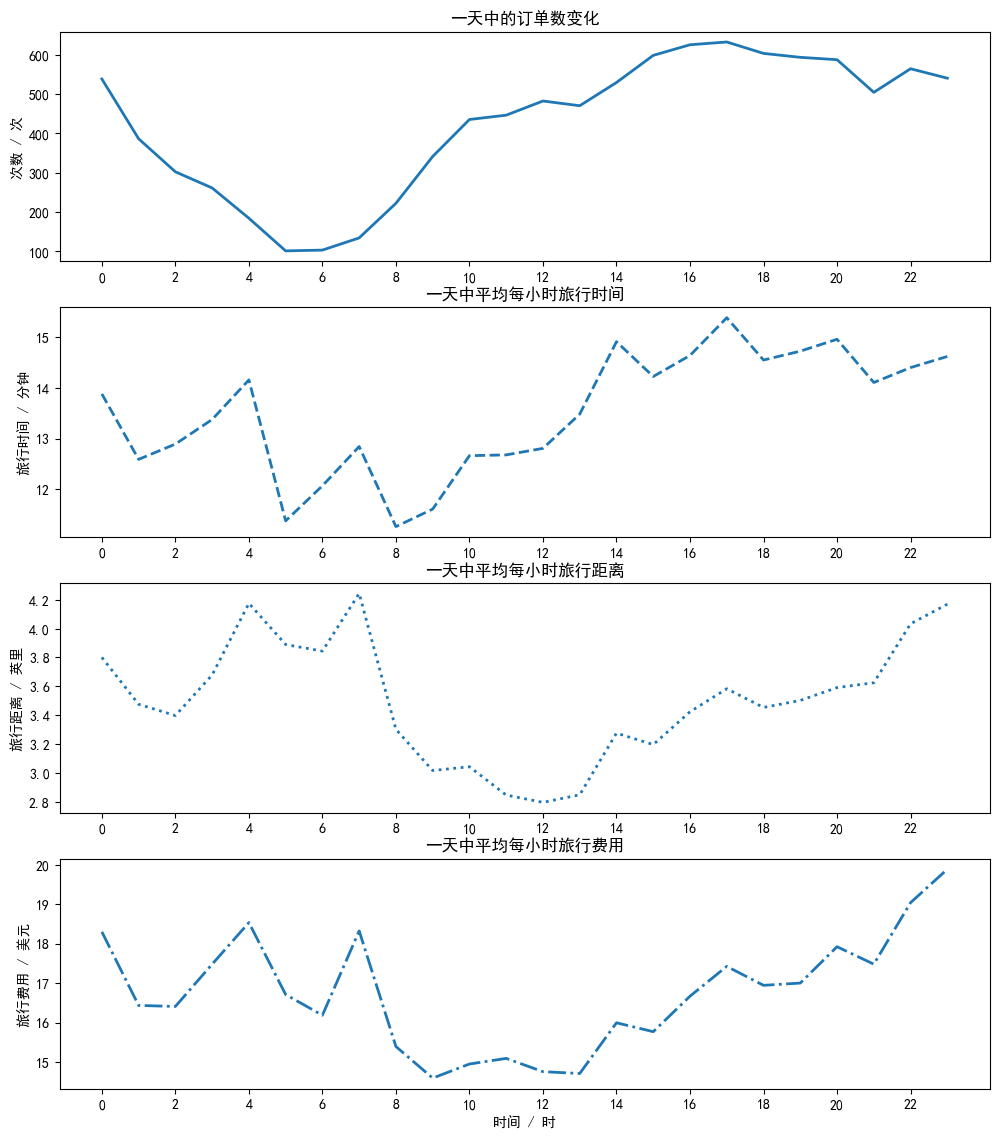

In [26]:
fig = plt.figure(figsize=(12, 14))
fig.set_dpi(100)

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_title('一天中的订单数变化')
ax1.set_xticks(range(0, 24, 2))
ax1.set_ylabel('次数 / 次')
ax1.plot(times, '-', linewidth=2, label='times')

ax2 = fig.add_subplot(412, sharex=ax1)
ax2.set_title('一天中平均每小时旅行时间')
ax2.set_ylabel('旅行时间 / 分钟')
ax2.plot(duration_mean, '--', linewidth=2, label='duration_mean')

ax3= fig.add_subplot(413, sharex=ax1)
ax3.set_title('一天中平均每小时旅行距离')
ax3.set_ylabel('旅行距离 / 英里')
ax3.plot(trip_distance_mean, ':', linewidth=2, label='trip_distance_mean')

ax4= fig.add_subplot(414, sharex=ax1)
ax4.set_title('一天中平均每小时旅行费用')
ax4.set_xlabel('时间 / 时')
ax4.set_ylabel('旅行费用 / 美元')
ax4.plot(amount_mean, '-.', linewidth=2, label='amount_mean')

# plt.savefig('1.jpg')

In [5]:
index = []
for i in range(data.shape[0]):
    if pd.to_datetime(data['date'][i]).day == 10:
        index.append(i)
data10 = data.iloc[index, :]


times = []
duration_mean = []
trip_distance_mean = []
amount_mean = []

for i in range(24):
    data10i = data10[data10['time'] == i]
    times.append(data10i.shape[0])
    duration_mean.append(data10i['duration'].mean())
    trip_distance_mean.append(data10i['trip_distance'].mean())
    amount_mean.append(data10i['total_amount'].mean())

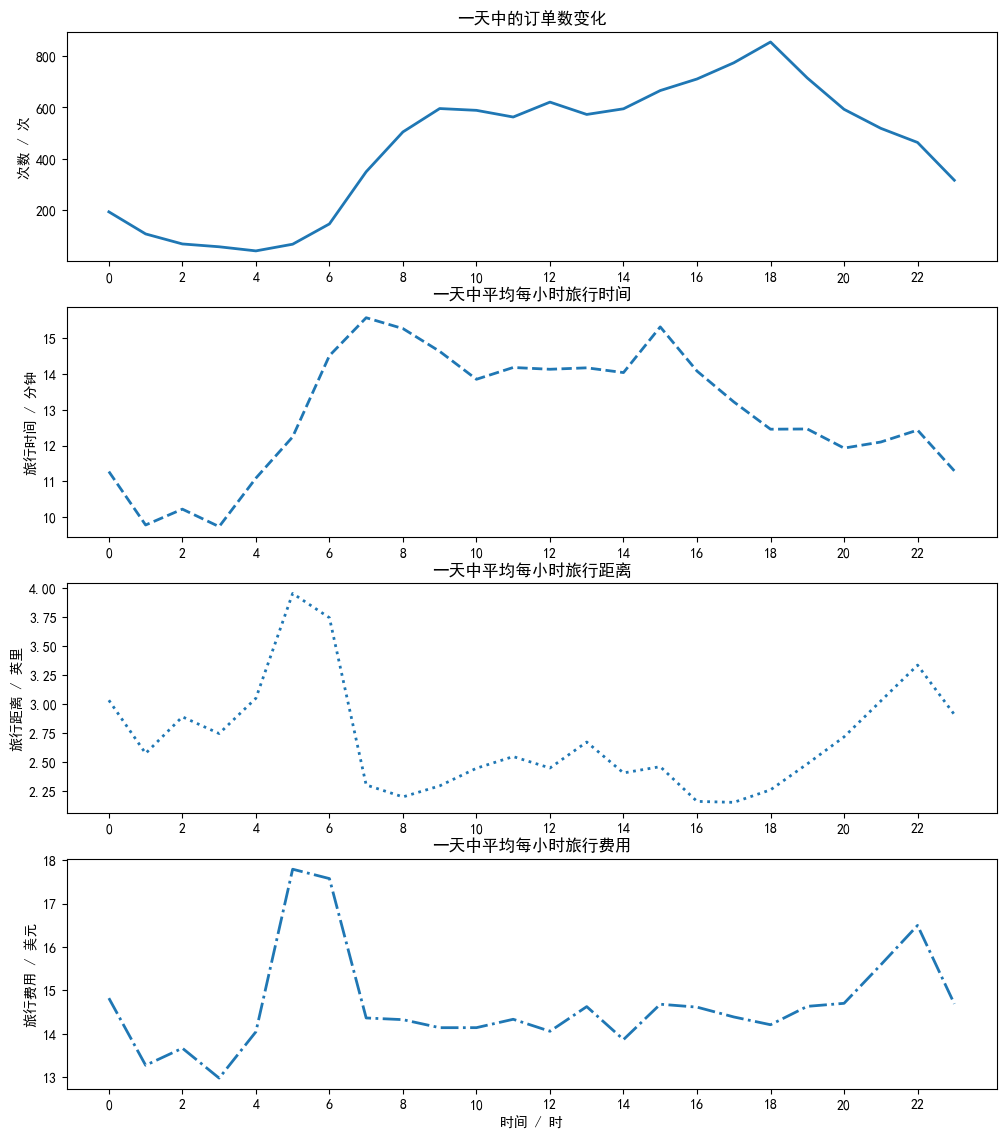

In [6]:
fig = plt.figure(figsize=(12, 14))
fig.set_dpi(100)

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_title('一天中的订单数变化')
ax1.set_xticks(range(0, 24, 2))
ax1.set_ylabel('次数 / 次')
ax1.plot(times, '-', linewidth=2, label='times')

ax2 = fig.add_subplot(412, sharex=ax1)
ax2.set_title('一天中平均每小时旅行时间')
ax2.set_ylabel('旅行时间 / 分钟')
ax2.plot(duration_mean, '--', linewidth=2, label='duration_mean')

ax3= fig.add_subplot(413, sharex=ax1)
ax3.set_title('一天中平均每小时旅行距离')
ax3.set_ylabel('旅行距离 / 英里')
ax3.plot(trip_distance_mean, ':', linewidth=2, label='trip_distance_mean')

ax4= fig.add_subplot(414, sharex=ax1)
ax4.set_title('一天中平均每小时旅行费用')
ax4.set_xlabel('时间 / 时')
ax4.set_ylabel('旅行费用 / 美元')
ax4.plot(amount_mean, '-.', linewidth=2, label='amount_mean')

# plt.savefig('7.jpg')

In [7]:
index = []
for i in range(data.shape[0]):
    if pd.to_datetime(data['date'][i]).day == 26:
        index.append(i)
data26 = data.iloc[index, :]


times = []
duration_mean = []
trip_distance_mean = []
amount_mean = []

for i in range(24):
    data26i = data26[data26['time'] == i]
    times.append(data26i.shape[0])
    duration_mean.append(data26i['duration'].mean())
    trip_distance_mean.append(data26i['trip_distance'].mean())
    amount_mean.append(data26i['total_amount'].mean())

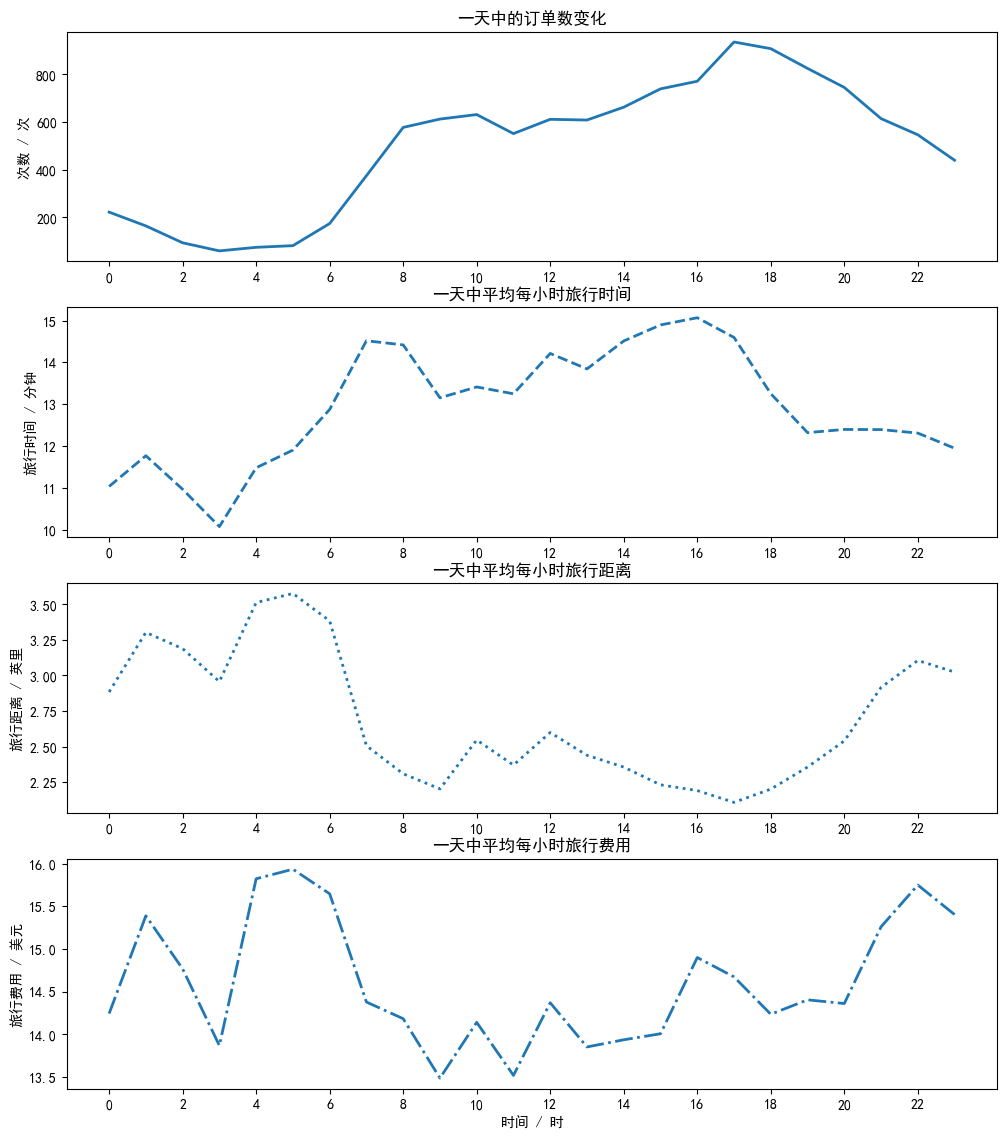

In [8]:
fig = plt.figure(figsize=(12, 14))
fig.set_dpi(100)

ax1 = fig.add_subplot(4, 1, 1)
ax1.set_title('一天中的订单数变化')
ax1.set_xticks(range(0, 24, 2))
ax1.set_ylabel('次数 / 次')
ax1.plot(times, '-', linewidth=2, label='times')

ax2 = fig.add_subplot(412, sharex=ax1)
ax2.set_title('一天中平均每小时旅行时间')
ax2.set_ylabel('旅行时间 / 分钟')
ax2.plot(duration_mean, '--', linewidth=2, label='duration_mean')

ax3= fig.add_subplot(413, sharex=ax1)
ax3.set_title('一天中平均每小时旅行距离')
ax3.set_ylabel('旅行距离 / 英里')
ax3.plot(trip_distance_mean, ':', linewidth=2, label='trip_distance_mean')

ax4= fig.add_subplot(414, sharex=ax1)
ax4.set_title('一天中平均每小时旅行费用')
ax4.set_xlabel('时间 / 时')
ax4.set_ylabel('旅行费用 / 美元')
ax4.plot(amount_mean, '-.', linewidth=2, label='amount_mean')

# plt.savefig('8.jpg')

### 1个月内出行情况的变化（以2019.09为例）

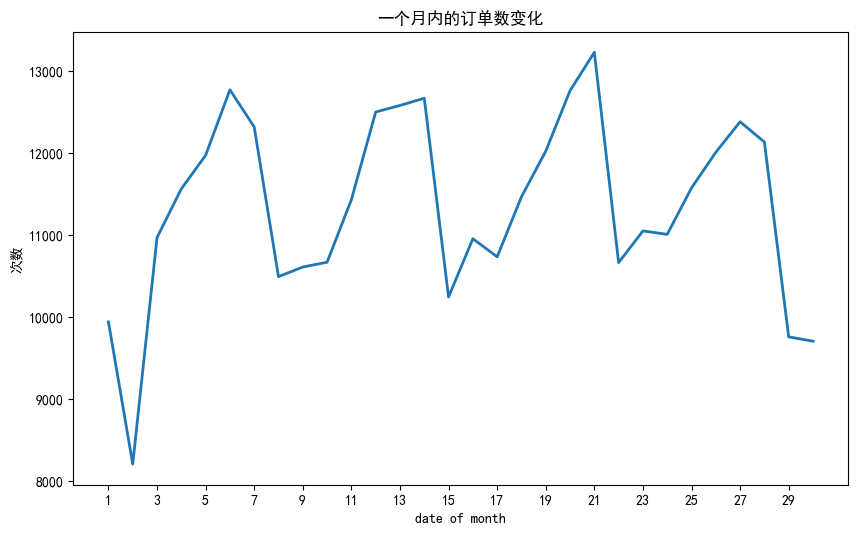

In [10]:
times = []

for i in range(1, 31):
    datai =  data[pd.DatetimeIndex(data['date']).day == i]
    times.append(datai.shape[0])
# times
fig = plt.figure(figsize=(10,6))
fig.set_dpi(100)

ax1 = fig.add_subplot()
ax1.set_title('一个月内的订单数变化')
ax1.set_xticks(range(1, 31, 2))
ax1.set_xlabel('date of month')
ax1.set_ylabel('次数')
ax1.plot(range(1,31), times, '-', linewidth=2, label='times')
# plt.savefig('2-0.jpg')

In [71]:
times = []

for i in range(1, 31):
    datai =  data[pd.DatetimeIndex(data['date']).day == i]
    times.append(datai.shape[0])
# times

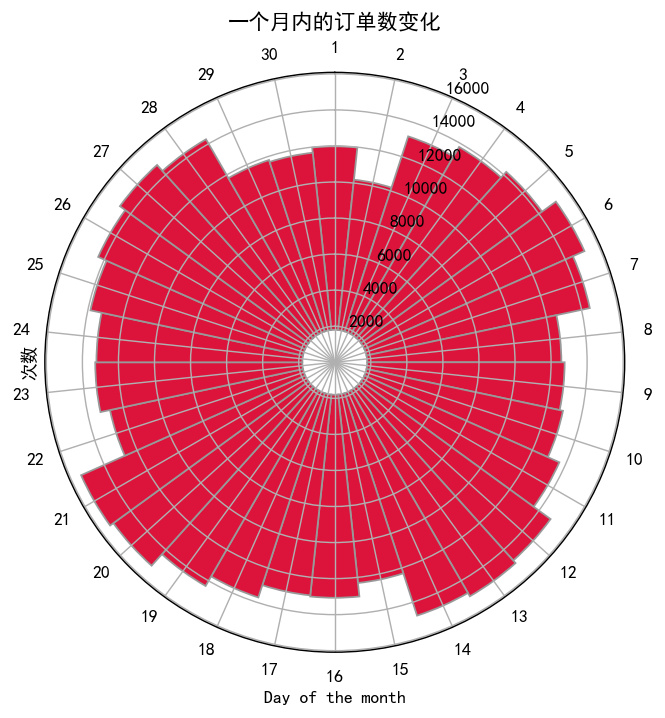

In [106]:
fig = plt.figure(figsize=(6,6))
fig.set_dpi(128)
ax = fig.add_subplot(polar=True)

N = 30
bottom = 1800
# create theta for 30 days
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
# width of each bin on the plot
width = (2*np.pi) / N
radii = np.array(times, dtype='int64')

ax.bar(theta, radii, width=width, bottom=bottom, color='crimson', edgecolor="#999999")
# set the lable go clockwise and start from the top
ax.set_theta_zero_location("N")
# clockwise
ax.set_theta_direction(-1)
# set the label
ax.set_xticks(theta)
ticks = ["{}".format(x) for x in range(1, 31)]
ax.set_xticklabels(ticks)
ax.set_xlabel('Day of the month')
ax.set_ylabel('次数')
ax.set_title('一个月内的订单数变化')
plt.savefig('2.jpg')
plt.show()

### 出租车上下车的空间分析

In [18]:
import geopandas as gpd
import contextily as ctx
import matplotlib.colors as colors

In [19]:
# Read in the taxi zone shapefile
sf = gpd.read_file('./taxi_zones/taxi_zones.shp')
zone = pd.read_csv("./taxi+_zone_lookup.csv")
sf['geometry'] = sf['geometry'].to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs')

In [14]:
# Compute pickup and dropoff amount of each zone
pu_zone = data.groupby(['PULocationID'], as_index=False).size()
do_zone = data.groupby(['DOLocationID'], as_index=False).size()
pu_zone = gpd.GeoDataFrame(pd.merge(pu_zone, sf, left_on='PULocationID', right_on='LocationID')).drop('LocationID', axis=1)
do_zone = gpd.GeoDataFrame(pd.merge(do_zone, sf, left_on='DOLocationID', right_on='LocationID')).drop('LocationID', axis=1)
pu_zone = pu_zone.to_crs(epsg=3857)
do_zone = do_zone.to_crs(epsg=3857)

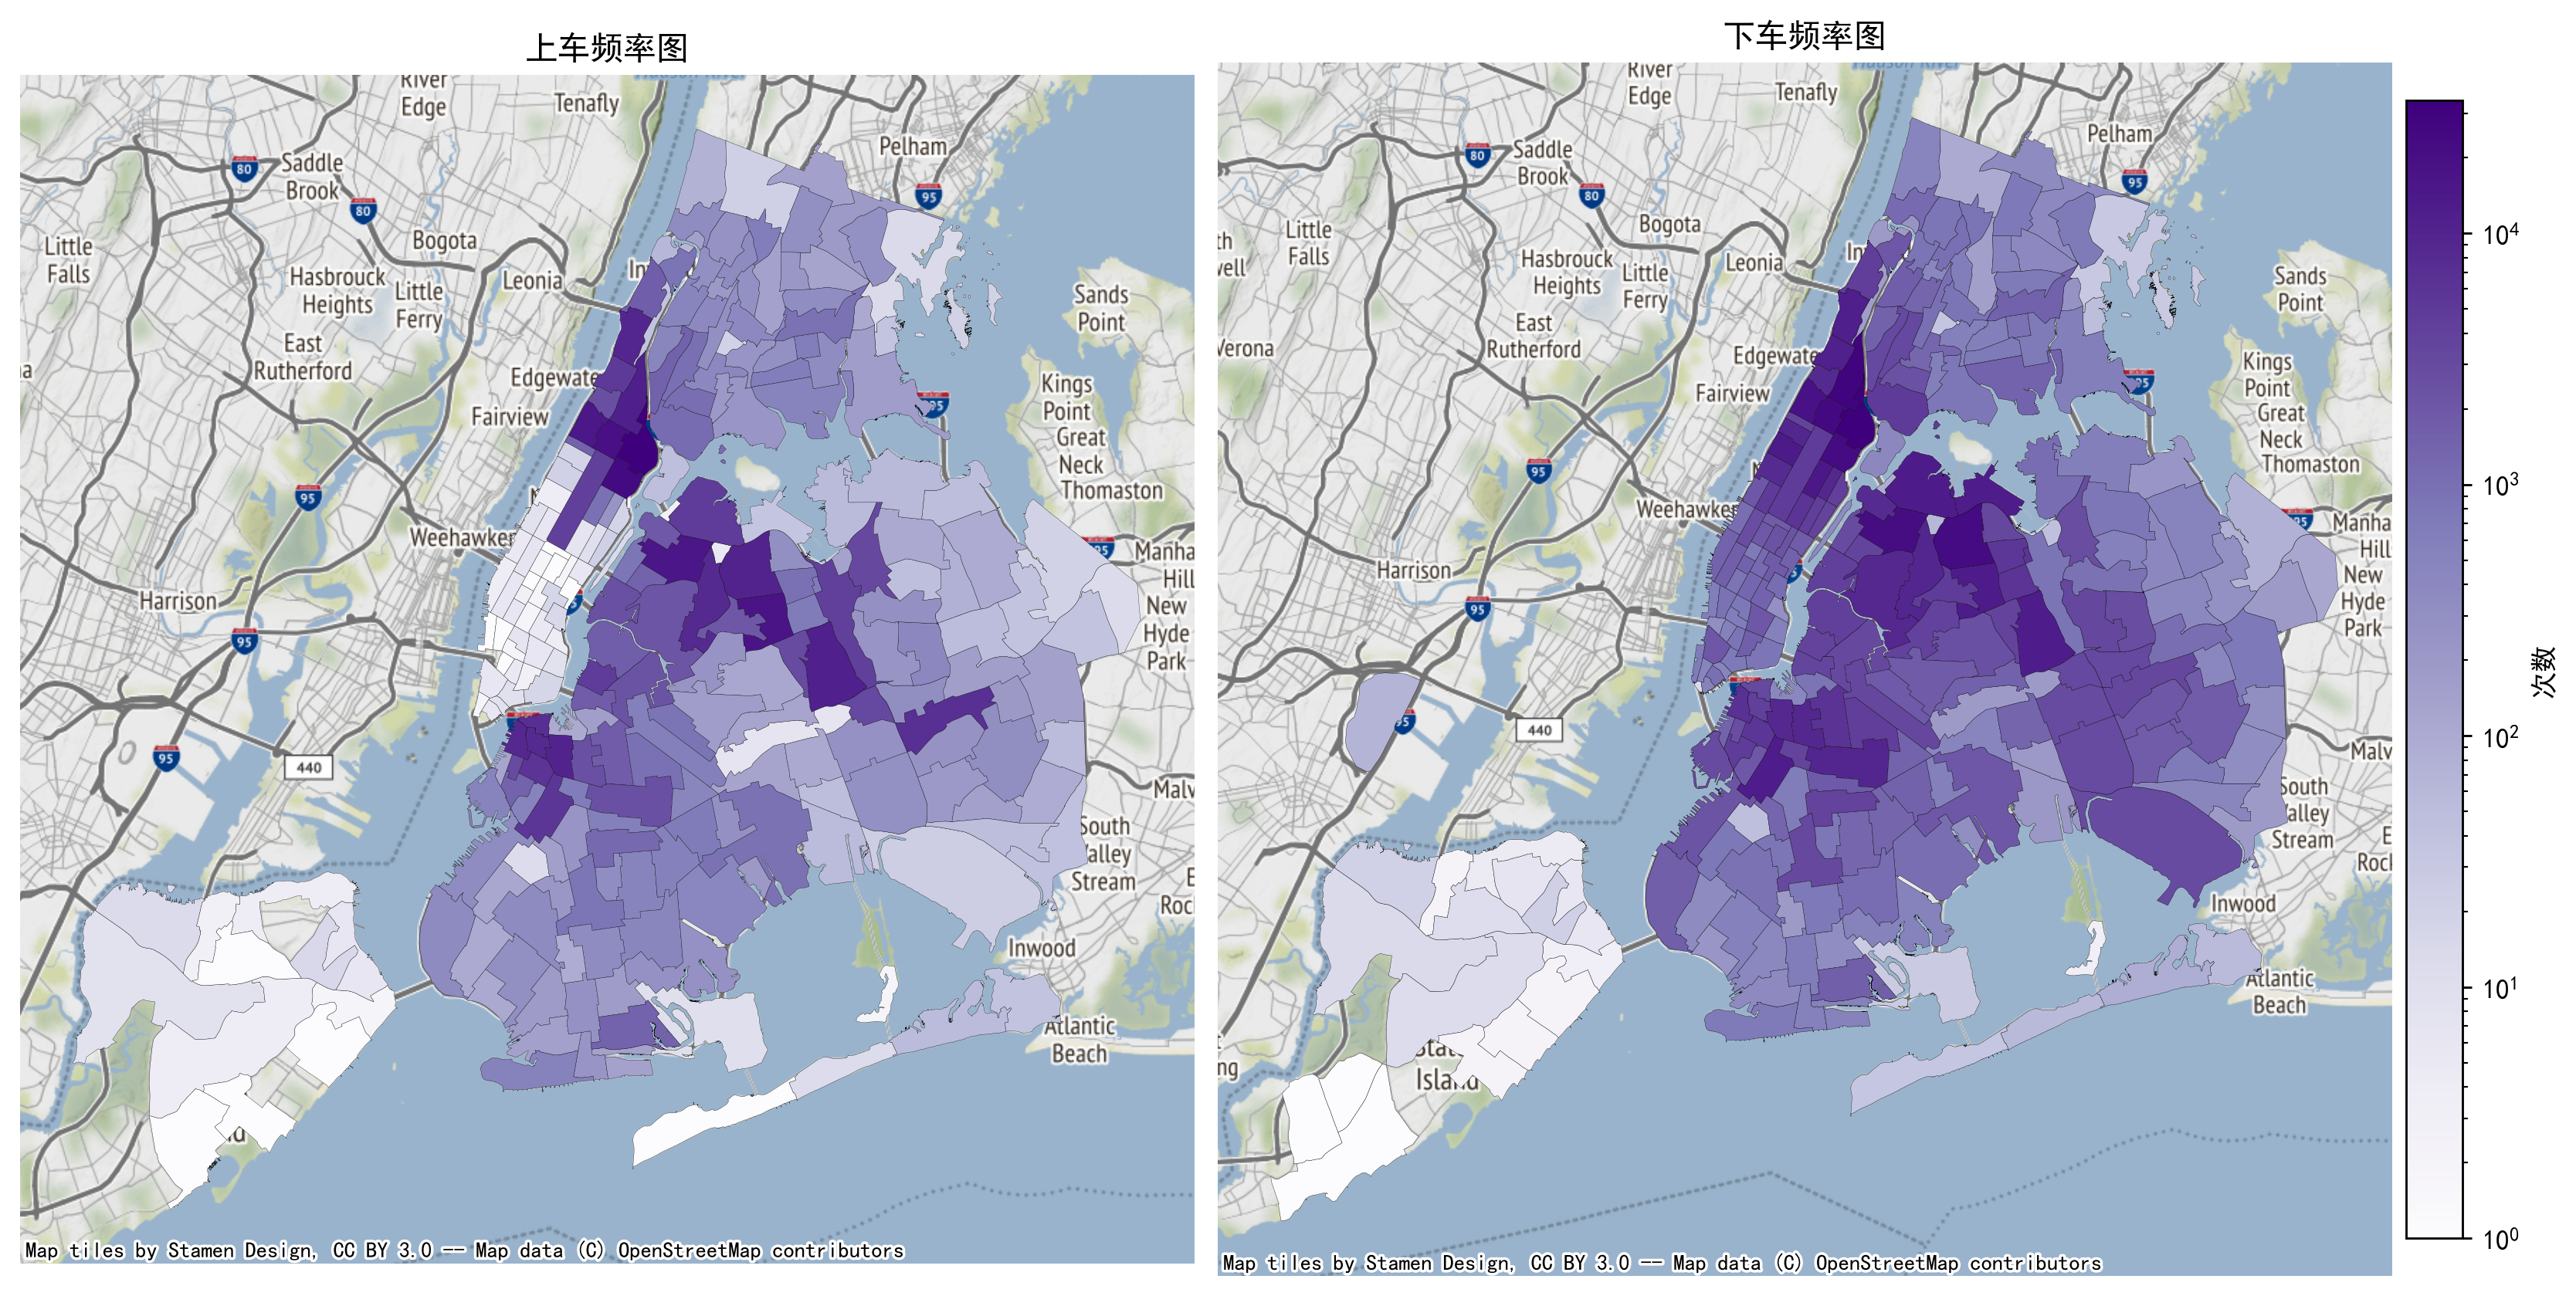

In [16]:
# plot geospatial visualisation to compare pickup and dropoff amount from each zone
fig, axs = plt.subplots(ncols=2, figsize=(20, 10))
fig.set_dpi(256)
fig.subplots_adjust(bottom=0.1, top=0.9, left=0.09, right=0.8, wspace=0.02, hspace=0.02)
# create a normalized colorbar
vmin, vmax = pu_zone['size'].min(), pu_zone['size'].max()
axs[0] = pu_zone.plot(column='size', linewidth=0.09, edgecolor='k', figsize=(10, 10), 
                      norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Purples', legend=False, ax=axs[0]) 
ctx.add_basemap(axs[0])
vmin, vmax = do_zone['size'].min(), do_zone['size'].max()
axs[1] = do_zone.plot(column='size', linewidth=0.1, edgecolor='k', figsize=(10, 10), 
                      norm=colors.LogNorm(vmin=vmin, vmax=vmax), cmap='Purples', legend=False, ax=axs[1])
ctx.add_basemap(axs[1])
axs[0].set_title('上车频率图')
axs[1].set_title('下车频率图')
axs[0].set_axis_off()
axs[1].set_axis_off()
# draw the color bar
patch_col = axs[0].collections[0]
cb = fig.colorbar(patch_col, ax=axs, shrink=0.72, orientation="vertical", pad=0.005)
cb.ax.set_ylabel('次数')
plt.show()
# plt.savefig('3.png')

### 出租车的接客趋势

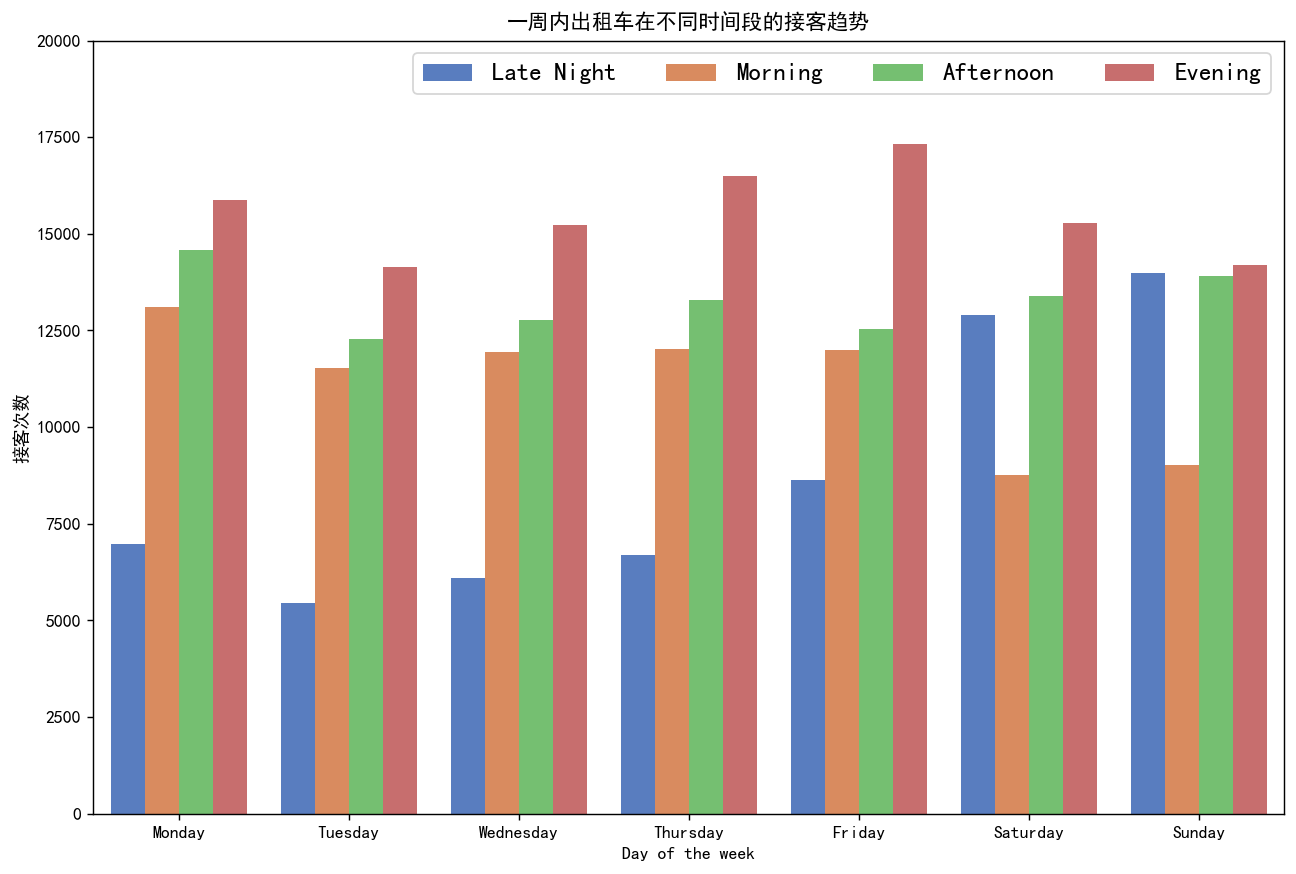

In [15]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df = pd.crosstab(data['weekday'], data['time_desc']).reindex(cats, axis=0)
stacked = df.stack().reset_index().rename(columns={0:'pick_ups'})
time_order = ['Late Night', 'Morning', 'Afternoon', 'Evening']
stacked.time_desc = pd.Categorical(stacked.time_desc, categories=time_order)

fig, ax = plt.subplots(figsize=(12,8))
fig.set_dpi(128)
sns.barplot(x=stacked.weekday, y=stacked.pick_ups, hue=stacked.time_desc, ax=ax, palette = 'muted')
ax.set_xlabel('Day of the week')
ax.set_ylabel('接客次数')
ax.set_title('一周内出租车在不同时间段的接客趋势')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 20000)
plt.legend(loc=1, ncol=len(stacked.time_desc), prop={'size': 14})
plt.show()
# plt.savefig('4.jpg')

### 乘客的小票行为分析

In [25]:
# calculate tip percentage using tip amount and total amount
data['tip_percent'] = (data.tip_amount / data.total_amount) * 100

In [26]:
# filter payment type cash, since tips are not recorded in cash payment
tip = data[data['payment_type'] != 2]

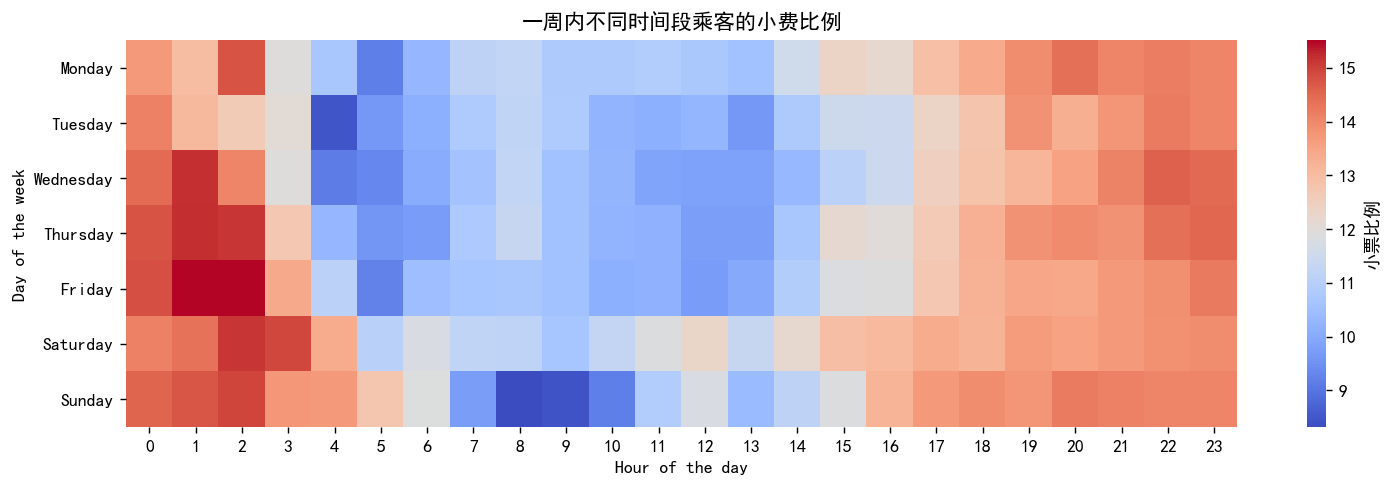

In [27]:
# compute the tipping percentage in each hour through the week
tip_percent = tip.groupby(['weekday', 'time'], as_index=False)['tip_percent'].mean()
tip_percent.weekday = pd.Categorical(tip_percent.weekday, categories=cats)
tip_percent = tip_percent.sort_values(['weekday', 'time']).reset_index(drop=True)
tip_percent_heatmap = pd.pivot_table(tip_percent, values='tip_percent', index='weekday', columns='time')

fig, ax = plt.subplots(figsize=(14, 4))
fig.set_dpi(128)
sns.heatmap(tip_percent_heatmap, cbar_kws={'label': '小票比例'}, ax=ax, cmap='coolwarm')
ax.set_ylabel('Day of the week')
ax.set_xlabel('Hour of the day')
ax.set_title('一周内不同时间段乘客的小费比例')
# plt.savefig('5.jpg')
plt.show()

In [28]:
do_tip = tip.groupby(['DOLocationID'], as_index=False)['tip_amount'].mean()
do_gdf = gpd.GeoDataFrame(pd.merge(do_tip, sf, left_on='DOLocationID', right_on='LocationID')).drop('DOLocationID',axis=1)

# idenitify missing taxi zone
missing_list = list(set(sf['OBJECTID']) - set(do_gdf['OBJECTID']))
missing = sf[sf['OBJECTID'].isin(missing_list)]
missing.insert(0, 'tip_amount', np.nan, True)
missing = missing.drop('LocationID', axis=1)
do_gdf = pd.concat([do_gdf, missing]).reset_index().drop('LocationID', axis=1)
do_gdf = do_gdf.rename({'OBJECTID':'LocationID'}, axis=1)
do_gdf = do_gdf.to_crs(epsg=3857)


pu_tip = tip.groupby(['PULocationID'], as_index=False)['tip_amount'].mean()
pu_gdf = gpd.GeoDataFrame(pd.merge(pu_tip, sf, left_on='PULocationID', right_on='LocationID')).drop('PULocationID',axis=1)

# idenitify missing taxi zone
missing_list = list(set(sf['OBJECTID']) - set(pu_gdf['OBJECTID']))
missing = sf[sf['OBJECTID'].isin(missing_list)]
missing.insert(0, 'tip_amount', np.nan, True)
missing = missing.drop('LocationID', axis=1)
pu_gdf = pd.concat([pu_gdf, missing]).reset_index().drop('LocationID', axis=1)
pu_gdf = pu_gdf.rename({'OBJECTID':'LocationID'}, axis=1)
pu_gdf = pu_gdf.to_crs(epsg=3857)


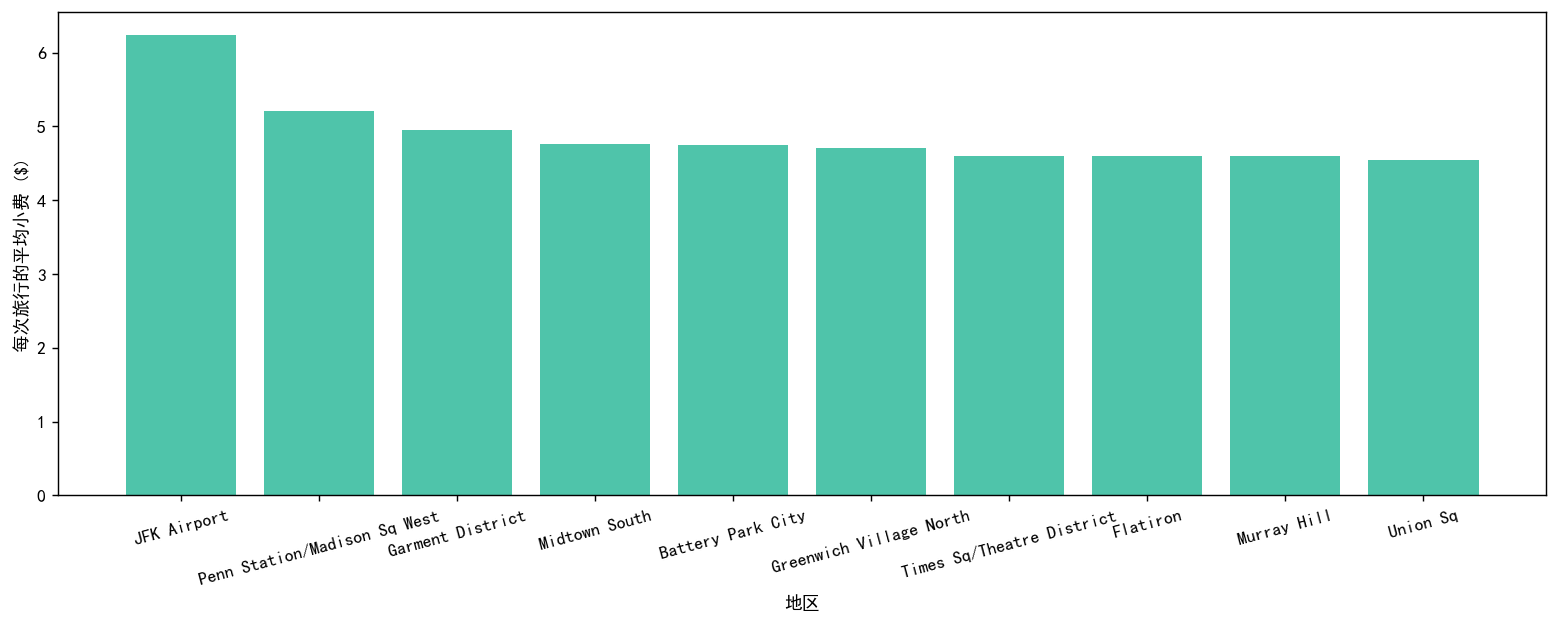

In [31]:
# identify top 10 zone with highest average tips
top_10 = pd.merge(do_gdf, tip['DOLocationID'].value_counts().sort_index(), left_on='LocationID', right_on=tip['DOLocationID'].value_counts().sort_index().index)
top_10 = top_10.rename({'DOLocationID': 'Pickup_freq'}, axis=1)
top_10 = top_10[top_10['Pickup_freq'] > 100]
top_10 = top_10.sort_values('tip_amount', ascending=False)[:10]

fig, ax = plt.subplots(figsize=(15, 5))
fig.set_dpi(128)
ax.bar(top_10['zone'], top_10['tip_amount'], color='#4fc4aa')
ax.set_xlabel('地区')
ax.set_ylabel('每次旅行的平均小费 ($)')
plt.xticks(rotation=15)
# plt.savefig('6.jpg', bbox_inches='tight')
plt.show()